In [21]:
import os
import glob

import matplotlib.pyplot as plt
import pandas as pd

In [54]:
EVALUATION_DIR = os.path.join('..', 'PROJECT','EVALUATION')
csv_files = [file for file in os.listdir(EVALUATION_DIR) if file.endswith('.csv')]

In [55]:
print(csv_files)

['ConvTasNet_SI-SDR_10_epochs.csv', 'TransUNet_MSE_mask_10_epochs.csv', 'UNetDNP_SI-SDR_10_epochs.csv', 'UNet_MSE_mask_10_epochs.csv']


In [56]:
data = []
for file in csv_files:
    df = pd.read_csv(os.path.join(EVALUATION_DIR, file), index_col=0)
    df = df.rename(columns=lambda x: f"{file.split('_')[0]}-{x}")
    data.append(df)

In [57]:
print([len(data[i]) for i in range(len(data))])

[6102, 6102, 6102, 6102]


In [58]:
df = pd.concat(data, axis=1)
df.head(100)

,ConvTasNet-SDR,ConvTasNet-SIR,ConvTasNet-SAR,ConvTasNet-PESQ-wb,ConvTasNet-PESQ-nb,ConvTasNet-STOI,TransUNet-SDR,TransUNet-SIR,TransUNet-SAR,TransUNet-PESQ-wb,...,UNetDNP-SAR,UNetDNP-PESQ-wb,UNetDNP-PESQ-nb,UNetDNP-STOI,UNet-SDR,UNet-SIR,UNet-SAR,UNet-PESQ-wb,UNet-PESQ-nb,UNet-STOI
0,17.977329,36.194252,18.059366,3.233226,3.619332,0.987433,-17.190773,21.550356,-17.190107,1.903501,...,14.035648,2.787961,3.291026,0.980017,-15.295969,50.565861,-15.295950,1.570337,1.999738,0.868956
1,16.407366,30.721937,16.582043,2.749493,3.086310,0.954985,-28.823135,7.440589,-28.822075,1.498836,...,14.823952,2.187067,2.761387,0.934991,-23.539087,14.658825,-23.535786,1.210279,1.473868,0.765839
2,21.725702,42.130928,21.768318,2.332600,2.878917,0.961150,-28.239105,27.532511,-28.239063,1.653467,...,16.985132,1.865367,2.459965,0.951456,-34.525471,9.726097,-34.524750,1.257737,1.659449,0.860558
3,17.294950,32.612717,17.424271,3.219516,3.516261,0.982699,-24.010597,20.164595,-24.007828,1.475019,...,9.847276,2.141226,2.801395,0.967590,-21.478661,17.508114,-21.476675,1.319781,1.737404,0.859306
4,11.786697,24.159729,12.053790,2.388928,2.930843,0.952874,-31.194708,4.688354,-31.193405,1.704571,...,11.202702,1.980907,2.370438,0.949077,-31.809031,7.127397,-31.807632,1.309886,1.367046,0.829373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.039018,17.814907,10.232909,2.727755,3.459503,0.970570,-42.248493,-3.414976,-42.247875,1.775856,...,9.663186,2.122084,3.026285,0.944318,-30.643957,5.813907,-30.642906,1.194896,1.557765,0.775794
96,7.642513,16.612244,8.328856,1.610022,2.448010,0.873800,-28.558687,20.063210,-28.558208,1.293214,...,8.057158,1.407486,2.019726,0.787868,-25.685844,7.496291,-25.682930,1.149917,1.295798,0.659323
97,7.155613,14.750660,8.409345,2.625050,3.158883,0.975302,-22.658794,0.358758,-22.636963,1.578001,...,7.738622,2.267729,2.905412,0.964191,-29.925890,-2.252187,-29.917015,1.380434,1.770729,0.848126
98,11.840889,24.024109,12.308667,2.939854,3.307030,0.920716,-28.886162,0.679283,-28.873001,1.950847,...,10.369237,2.393102,2.913766,0.901774,-29.064608,21.263512,-29.051899,1.361215,1.848593,0.830127


['ConvTasNet-SDR', 'TransUNet-SDR', 'UNetDNP-SDR', 'UNet-SDR']
ConvTasNet-SDR    10.69
TransUNet-SDR    -27.83
UNetDNP-SDR        7.61
UNet-SDR         -26.99
dtype: float64


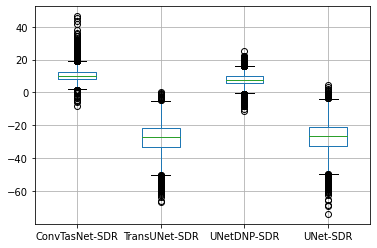

In [61]:
cols = [c for c in df.columns if any(metric in c for metric in ['SDR'])]#['SDR', 'SIR', 'SAR'])]
print(cols)

print(df[cols].mean().round(2))

plt.figure()
df[cols].boxplot()
plt.show()

In [60]:
print(df.mean().round(2))

ConvTasNet-SDR        10.69
ConvTasNet-SIR        22.19
ConvTasNet-SAR        11.30
ConvTasNet-PESQ-wb     1.83
ConvTasNet-PESQ-nb     2.38
ConvTasNet-STOI        0.85
TransUNet-SDR        -27.83
TransUNet-SIR         12.24
TransUNet-SAR        -27.81
TransUNet-PESQ-wb      1.42
TransUNet-PESQ-nb      1.90
TransUNet-STOI         0.75
UNetDNP-SDR            7.61
UNetDNP-SIR           16.90
UNetDNP-SAR            8.55
UNetDNP-PESQ-wb        1.56
UNetDNP-PESQ-nb        2.07
UNetDNP-STOI           0.82
UNet-SDR             -26.99
UNet-SIR              18.11
UNet-SAR             -26.98
UNet-PESQ-wb           1.29
UNet-PESQ-nb           1.74
UNet-STOI              0.75
dtype: float64
